<a href="https://colab.research.google.com/github/Riccyvt/Actividades/blob/main/Tarea10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
#1. Importar bibliotecas necesarias para EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
sns.set(color_codes=True)

In [95]:
#2. Cargar los datos en el marco de datos
#Especificar la codificación adecuada
data = pd.read_csv("data.csv", encoding='ISO-8859-1')
# Muestra las 5 filas superiores
data.head(5)

<ipython-input-95-9c580cc75c6f>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data.csv", encoding='ISO-8859-1')


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,01/02/1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,01/02/1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,01/02/1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,01/03/1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,01/03/1990


In [96]:
#Devuelve una cantidad de filas y columnas del dataframe
data.shape

(435742, 13)

In [98]:
#Devuelve una cantidad de valores nulos en cada columna.
data.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [99]:
#Devuelve rango, columna, número de objetos no nulos de cada columna, tipo de datos y uso de memoria.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [100]:
#Da como resultado una cantidad de valores no nulos en cada columna.
data.count()

stn_code                       291665
sampling_date                  435739
state                          435742
location                       435739
agency                         286261
type                           430349
so2                            401096
no2                            419509
rspm                           395520
spm                            198355
location_monitoring_station    408251
pm2_5                            9314
date                           435735
dtype: int64

In [69]:
#Detalles resumidos excluyendo los valores nulos NAN
data.describe()

,stn_code,so2,no2,rspm,spm,pm2_5
count,26710.000000,40635.000000,40823.000000,40052.000000,17684.000000,0.0
mean,484.223437,7.051000,19.219750,84.625806,184.624497,NaN
std,175.035971,5.440479,10.632714,49.220458,99.794442,NaN
min,95.000000,0.400000,0.500000,2.000000,5.000000,NaN
25%,387.000000,4.500000,12.300000,52.000000,115.000000,NaN
50%,537.000000,5.700000,16.000000,75.000000,170.000000,NaN
75%,586.000000,8.000000,24.000000,104.000000,236.000000,NaN
max,788.000000,228.000000,334.900000,790.000000,1300.000000,NaN


In [101]:
#Limpiar el conjunto de datos
# 1. Eliminar columnas menos valoradas
new_data = data.drop(['stn_code', 'sampling_date', 'agency', 'location_monitoring_station'], axis=1)
# Eliminar filas del DataFrame new_data donde no hay datos disponibles en la columna 'date'.
#new_data = data.dropna(subset=['date'], inplace=True)

In [102]:
#2. Cambiar la columna type a formato uniforme
reemplazar = {'Residential, Rural and other Areas':'RRO','Industrial Area':'I','Industrial Areas':'I'}
new_data['type'] = new_data['type'].replace(reemplazar)

In [103]:
#3. Crear columna con año
# Primero, conviertir la columna 'date' en tipo datetime.
new_data['date'] = pd.to_datetime(new_data['date'], errors='coerce')  # 'coerce' manejará valores no válidos como NaN.
# Luego, extraer el año y crear una nueva columna 'year'
new_data['year'] = new_data['date'].dt.year
# Convertir los valores de la columna 'year' a enteros, eliminando los decimales .0.
new_data['year'] = new_data['year'].fillna(0).astype(int)
new_data.head()

<ipython-input-103-1f7459d85c0f>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  new_data['date'] = pd.to_datetime(new_data['date'], errors='coerce')  # 'coerce' manejará valores no válidos como NaN.


,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-01-02,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-01-02,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-01-02,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-01-03,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-01-03,1990


In [111]:
#Revisar los nombres de columnas para segmentar las que se van a imputar
print(new_data.columns)

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date', 'year'],
      dtype='object')


In [108]:
# Lista de columnas que se deben imputar
columnas_a_imputar = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
# Verificar el tipo de datos de las columnas
tipos_de_datos = new_data[columnas_a_imputar].dtypes
print(tipos_de_datos)

so2      float64
no2      float64
rspm     float64
spm      float64
pm2_5    float64
dtype: object


In [110]:
#Manejo de valores faltantes

# Importar las bibliotecas necesarias
from sklearn.impute import SimpleImputer
# Lista de columnas que se deben imputar
columnas_a_imputar = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
# Crear un SimpleImputer para llenar los valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
# Aplicar el imputer a las columnas especificadas
new_data[columnas_a_imputar] = imputer.fit_transform(new_data[columnas_a_imputar])
new_data.head()


,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,108.832784,220.78348,40.791467,1990-01-02,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,108.832784,220.78348,40.791467,1990-01-02,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,108.832784,220.78348,40.791467,1990-01-02,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,108.832784,220.78348,40.791467,1990-01-03,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,108.832784,220.78348,40.791467,1990-01-03,1990


In [112]:
#Encontrar valores nulos
new_data.isnull().sum()

state          0
location       3
type        5393
so2            0
no2            0
rspm           0
spm            0
pm2_5          0
date           7
year           0
dtype: int64

In [113]:
# Convertir los valores de la columna 'year' a enteros, eliminando los decimales .0.
new_data['year'] = new_data['year'].fillna(0).astype(int)
new_data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,108.832784,220.78348,40.791467,1990-01-02,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,108.832784,220.78348,40.791467,1990-01-02,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,108.832784,220.78348,40.791467,1990-01-02,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,108.832784,220.78348,40.791467,1990-01-03,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,108.832784,220.78348,40.791467,1990-01-03,1990


In [114]:
#¿Cuál es el estado que tiene mayor contenido de SO2?
# 1. Selecciona las columnas 'so2' y 'state' del DataFrame 'data'.
#    Esto crea un nuevo DataFrame que contiene solo estas dos columnas.
statewise_so2 = data[['so2','state']]

# 2. Agrupa los datos por la columna 'state' y calcula la mediana para la columna 'so2' en cada grupo.
#    El resultado es un DataFrame con una fila para cada estado y la mediana correspondiente de SO2 en ese estado.
statewise_so2 = statewise_so2.groupby('state', as_index=False).median()

# 3. Ordena el DataFrame resultante en función de los valores de SO2 en orden ascendente.
#    Esto significa que los estados con las medianas de SO2 más bajas estarán en la parte superior.
statewise_so2 = statewise_so2.sort_values(by='so2')

# 4. Muestra las primeras 10 filas del DataFrame resultante.
#    Esto mostrará los 10 estados con las medianas de SO2 más bajas.
statewise_so2.head(10)

,state,so2
1,Arunachal Pradesh,2.0
4,Chandigarh,2.0
23,Nagaland,2.0
22,Mizoram,2.0
21,Meghalaya,2.0
12,Himachal Pradesh,2.0
16,Kerala,3.4
20,Manipur,3.8
24,Odisha,4.0
30,Telangana,5.0


<Axes: xlabel='state'>

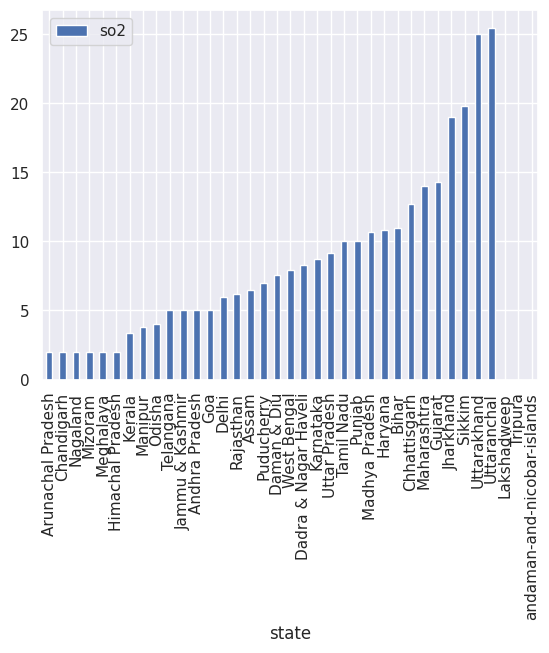

In [115]:
# 1. Se utiliza el método `plot` del DataFrame 'statewise_so2' para crear un gráfico de barras.
#    - `kind='bar'` especifica que se desea un gráfico de barras.
#    - `x='state'` especifica que los valores en la columna 'state' se utilizarán como el eje X del gráfico.
#    - `y='so2'` especifica que los valores en la columna 'so2' se utilizarán como el eje Y del gráfico.

statewise_so2.plot(kind='bar', x='state', y='so2')


In [118]:
#¿Cuál es el estado que tiene mayor contenido de NO2?
# Selecciona las columnas 'no2' y 'state' del DataFrame 'data' y crea un nuevo dataframe
statewise_no2 = data[['no2','state']]
# Agrupa los datos por la columna 'state' y calcula la mediana para la columna 'no2' en cada grupo.
statewise_no2 = statewise_no2.groupby('state', as_index=False).median()
# Ordena el DataFrame resultante en función de los valores de NO2 en orden ascendente.
statewise_no2 = statewise_no2.sort_values(by='no2')
#    Esto mostrará los 10 estados con las medianas de NO2 más bajas.
statewise_no2.head(10)


,state,no2
1,Arunachal Pradesh,5.0
22,Mizoram,5.0
23,Nagaland,6.0
21,Meghalaya,10.0
9,Goa,11.0
13,Jammu & Kashmir,12.9
16,Kerala,13.0
25,Puducherry,13.0
12,Himachal Pradesh,13.0
2,Assam,14.0


<Axes: xlabel='state'>

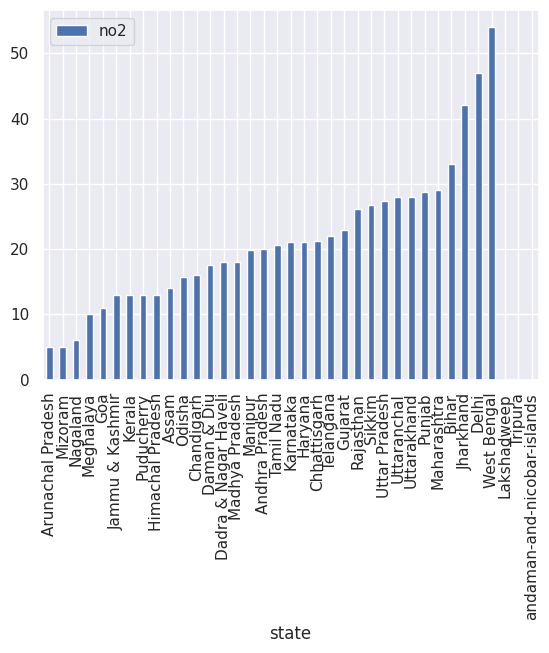

In [117]:
# 1. Se utiliza el método `plot` del DataFrame 'statewise_no2' para crear un gráfico de barras.
#    - `kind='bar'` especifica que se desea un gráfico de barras.
#    - `x='state'` especifica que los valores en la columna 'state' se utilizarán como el eje X del gráfico.
#    - `y='no2'` especifica que los valores en la columna 'no2' se utilizarán como el eje Y del gráfico.

statewise_no2.plot(kind='bar', x='state', y='no2')


In [119]:
#Selecciona las columnas 'rspm' y 'state'
#Agrupa los datos por la columna 'state', calculando la mediana de 'rspm' en cada grupo.
#Ordena el resultado en función de las medianas de 'rspm' en orden ascendente.
state_wise_rspm = data[['rspm','state']].groupby('state', as_index=False).median().sort_values(by='rspm')
#Muestra los 5 estados con las concentraciones más bajas de rspm
state_wise_rspm.head(5)

,state,rspm
28,Sikkim,32.0
22,Mizoram,40.0
25,Puducherry,41.0
16,Kerala,47.0
9,Goa,54.0


<Axes: xlabel='state'>

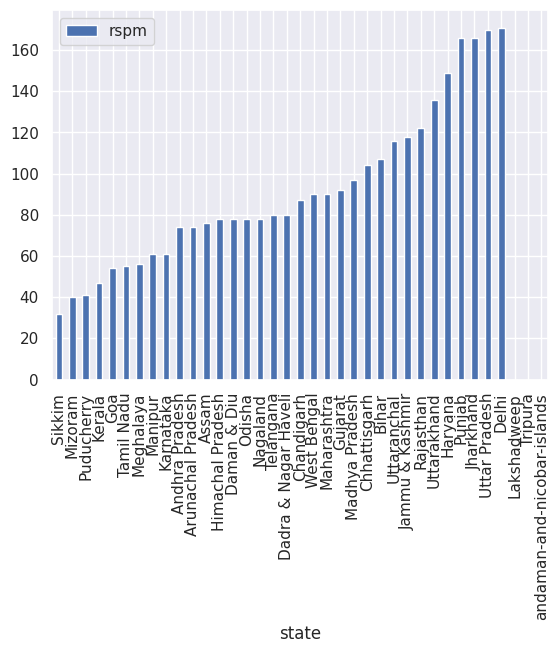

In [120]:
#Se genera un histograma del rspm
state_wise_rspm.plot(kind='bar',x='state',y='rspm')

In [125]:
#Selecciona las columnas 'spm' y 'state'
#Agrupa los datos por la columna 'state', calculando la mediana de 'spm' en cada grupo.
#Ordena el resultado en función de las medianas de 'spm' en orden ascendente.
state_wise_spm = data[['spm','state']].groupby('state', as_index=False).median().sort_values(by='spm')
state_wise_spm.head(5)

,state,spm
9,Goa,34.0
21,Meghalaya,68.5
16,Kerala,72.0
28,Sikkim,75.0
25,Puducherry,77.0


<Axes: xlabel='state'>

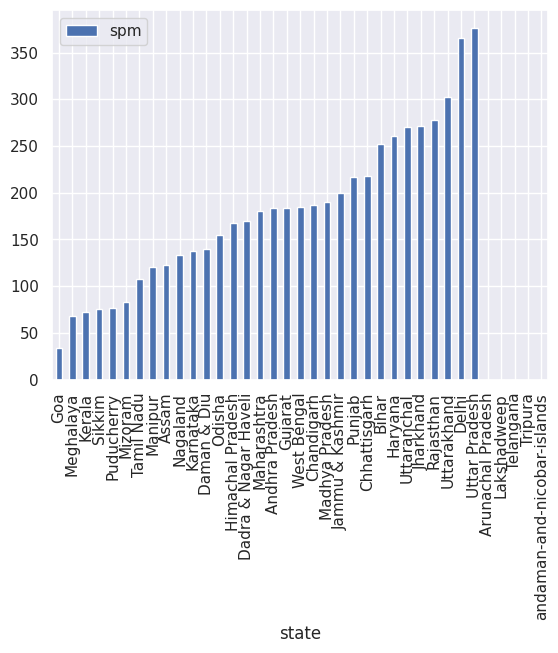

In [126]:
#Se genera un histograma del spm
state_wise_spm.plot(kind='bar',x='state',y='spm')

In [127]:
#¿Cuál es la tendencia anual en un estado en particular, digamos 'Andhra Pradesh'?
# Filtra el DataFrame 'data' para seleccionar solo las filas donde el valor en la columna 'state' sea igual a 'Andhra Pradesh'.
andhra = new_data[data['state'] == 'Andhra Pradesh']

# Selecciona las columnas 'so2', 'no2', 'rspm', 'spm', y 'year' del DataFrame 'andhra'.
# Luego, agrupa los datos por el año ('year') y calcula la mediana de las otras columnas para cada año.
year_wise_AP = andhra[['so2', 'no2', 'rspm', 'spm', 'year']].groupby('year').median()

# Muestra las primeras filas del DataFrame 'year_wise_AP'.
# Esto proporciona un resumen de las medianas de los contaminantes ('so2', 'no2', 'rspm', 'spm') para cada año en el estado de Andhra Pradesh.
year_wise_AP.head()


,so2,no2,rspm,spm
year,,,,
1990,5.60,13.6,108.832784,179.00000
1991,8.25,12.8,108.832784,141.50000
1992,12.40,27.6,108.832784,192.00000
1993,6.00,11.4,108.832784,220.78348
1994,8.70,14.2,108.832784,220.78348


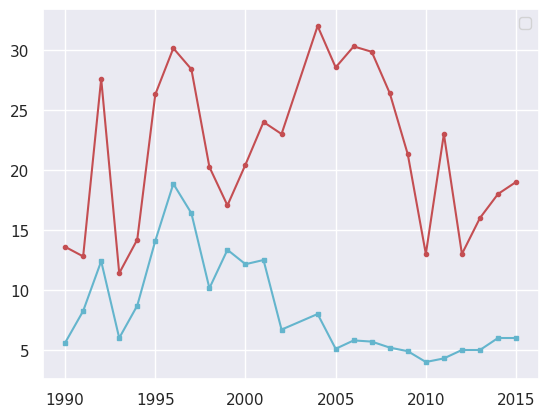

In [128]:
#Grafico de valores máximos y minimos de So2 y No2 por año
plt.plot(year_wise_AP['so2'],'-sc',markersize = 3)
plt.plot(year_wise_AP['no2'],'-or', markersize = 3)
plt.legend()

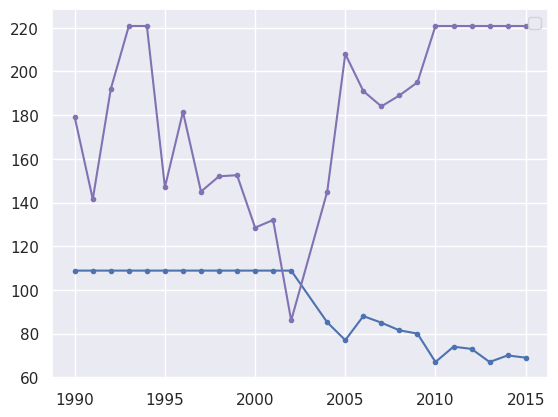

In [129]:
#Gráfoco de rspm y spm
plt.plot(year_wise_AP['rspm'],'-ob',markersize = 3)
plt.plot(year_wise_AP['spm'],'-om', markersize = 3)
plt.legend()

In [ ]:
#Bibliografía

#Escrito por Bala Kowsalya, 26 de febrero de 2019

#https://medium.com/@Kowsalya__Ckar/explore-your-data-exploratory-data-analysis-8b54dfdfb898
#https://github.com/BalaKowsalya/indian-air-quality/blob/master/India%20Air%20Quality-checkpoint.ipynb